# Housing Inventory: Active Listing Count in Miami-Dade County, FL 

         DATE  Listings_Count  Year      Month
0  2016-07-01         19334.0  2016       July
1  2016-08-01         19301.0  2016     August
2  2016-09-01         19313.0  2016  September
3  2016-10-01         19631.0  2016    October
4  2016-11-01         20062.0  2016   November
..        ...             ...   ...        ...
82 2023-05-01          9240.0  2023        May
83 2023-06-01          9065.0  2023       June
84 2023-07-01          8915.0  2023       July
85 2023-08-01          9059.0  2023     August
86 2023-09-01          9735.0  2023  September

[87 rows x 4 columns]
count       87.000000
mean     16607.551724
std       5415.895689
min       6376.000000
25%      10711.500000
50%      19631.000000
75%      20886.000000
max      23258.000000
Name: Listings_Count, dtype: float64


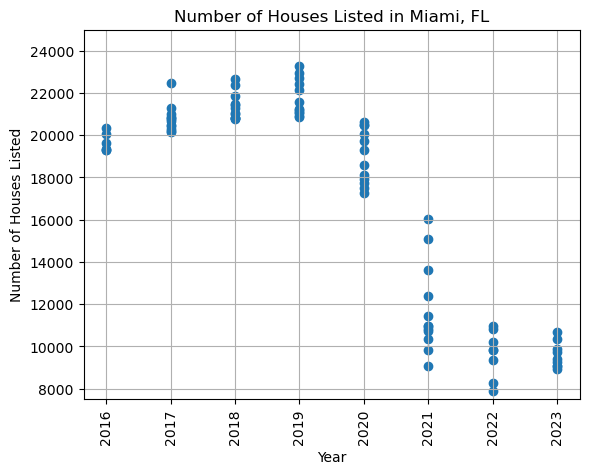

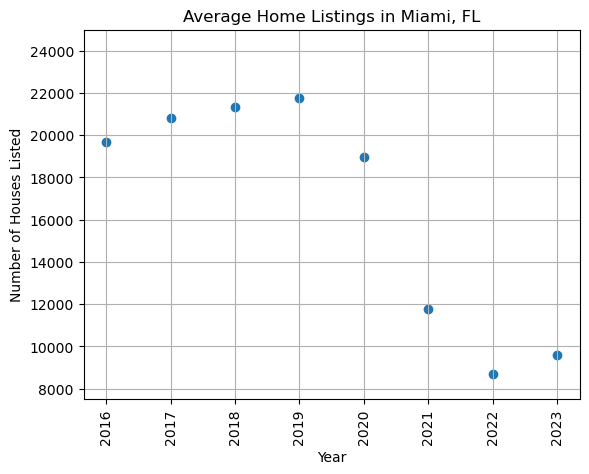

In [13]:
# Dependences
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

housing_path = Path("ACTLISCOU12086.csv")
Housing_df = pd.read_csv(housing_path)

# Convert the 'DATE' column to datetime
Housing_df['DATE'] = pd.to_datetime(Housing_df['DATE'])

# Extract the year component and create a new 'Year' column
Housing_df['Year'] = Housing_df['DATE'].dt.year
Housing_df['Month'] = Housing_df['DATE'].dt.month_name()
# Drop the original 'DATE' column if it's no longer needed
#Housing_DF = Housing_df.drop(columns=['DATE'])
Housing_DF = Housing_df.rename(columns={'ACTLISCOU12086': 'Listings_Count'})

Avg_Housing_DS = Housing_DF.groupby('Year')['Listings_Count'].mean()
Avg_Housing_DS = Avg_Housing_DS.rename('Average Listing')

Avg_MHousing_DS = Housing_DF.groupby('Month')['Listings_Count'].mean()
Avg_MHousing_DS = Avg_MHousing_DS.rename('Average Monthly Listing')

# Print the updated DataFrame
print(Housing_DF)
print(Housing_DF['Listings_Count'].describe())

#Listings by Year
y1_axis = Housing_DF['Listings_Count']
x1_axis = Housing_DF['Year']
plt.scatter(x1_axis, y1_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)
plt.show()

#Average Listings by Year
y2_axis = Avg_Housing_DS
x2_axis = Avg_Housing_DS.index
plt.scatter(x2_axis, y2_axis)
plt.xticks(rotation=90)
plt.title('Average Home Listings in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)
plt.show()





# Housing Inventory: Median Listing Price per Square Feet in Miami-Dade County, FL

         DATE  Housing_Price      Month  Year
0  2016-07-01          347.0       July  2016
1  2016-08-01          346.0     August  2016
2  2016-09-01          345.0  September  2016
3  2016-10-01          345.0    October  2016
4  2016-11-01          345.0   November  2016
..        ...            ...        ...   ...
82 2023-05-01          561.0        May  2023
83 2023-06-01          563.0       June  2023
84 2023-07-01          558.0       July  2023
85 2023-08-01          556.0     August  2023
86 2023-09-01          552.0  September  2023

[87 rows x 4 columns]


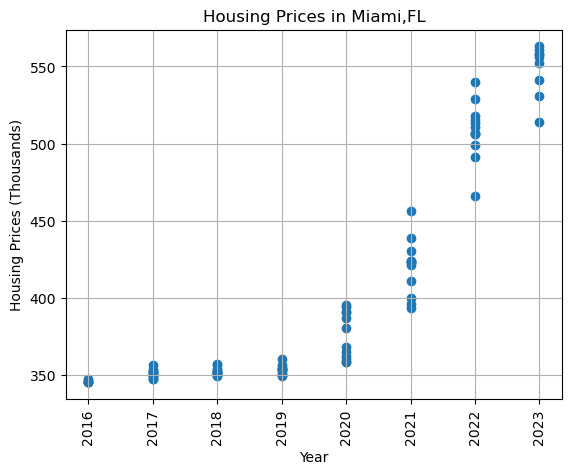

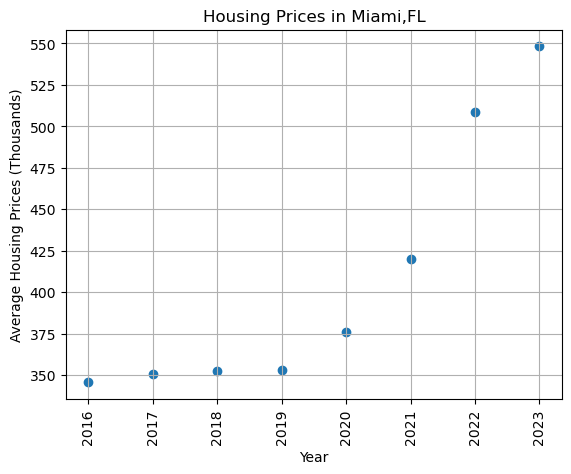

In [12]:
# Dependences
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

housPrice_path = Path("MEDLISPRIPERSQUFEE12086.csv")
housPrice_df = pd.read_csv(housPrice_path, delimiter =',')
# Convert the 'DATE' column to datetime
housPrice_df['DATE'] = pd.to_datetime(housPrice_df['DATE'])

# Extract the year component and create a new 'Year' column
housPrice_df['Month'] = housPrice_df['DATE'].dt.month_name()
housPrice_df['Year'] = housPrice_df['DATE'].dt.year
# Drop the original 'DATE' column if it's no longer needed
#HousPrice_DF = housPrice_df.drop(columns=['MEDLISPRIPERSQUFEE12086'])
housPrice_df = housPrice_df.rename(columns={'MEDLISPRIPERSQUFEE12086': 'Housing_Price'})

# Print the updated DataFrame
print(housPrice_df)

yaxis = housPrice_df['Housing_Price']
xaxis = housPrice_df["Year"]
plt.scatter(xaxis, yaxis)
plt.xticks(rotation=90)
plt.title('Housing Prices in Miami,FL')
plt.xlabel('Year')
plt.ylabel('Housing Prices (Thousands)')
plt.grid(True)
plt.show()

Avg_housPrice_ds = housPrice_df.groupby('Year')['Housing_Price'].mean()
Avg_housPrice_ds = Avg_housPrice_ds.rename('Average_Listing')
Avg_housPrice_ds
yaxis = Avg_housPrice_ds
xaxis = Avg_housPrice_ds.index
plt.scatter(xaxis, yaxis)
plt.xticks(rotation=90)
plt.title('Housing Prices in Miami,FL')
plt.xlabel('Year')
plt.ylabel('Average Housing Prices (Thousands)')
plt.grid(True)
plt.show()




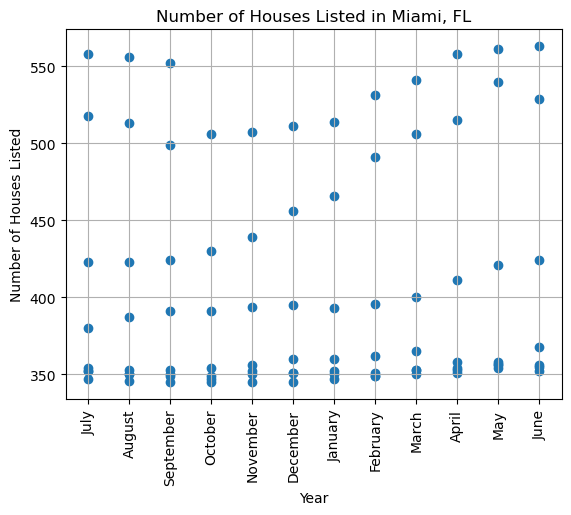

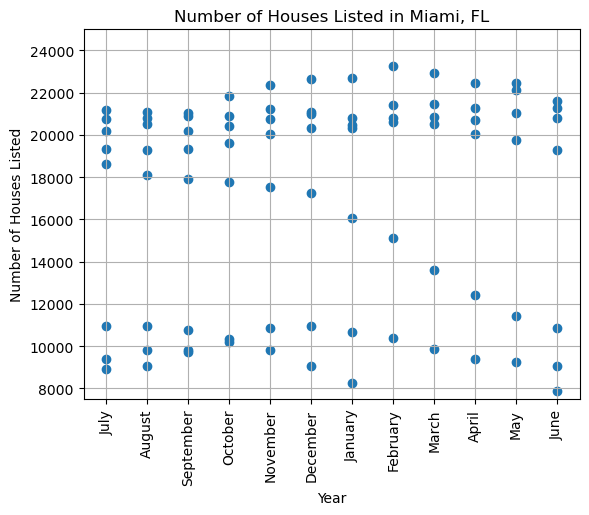

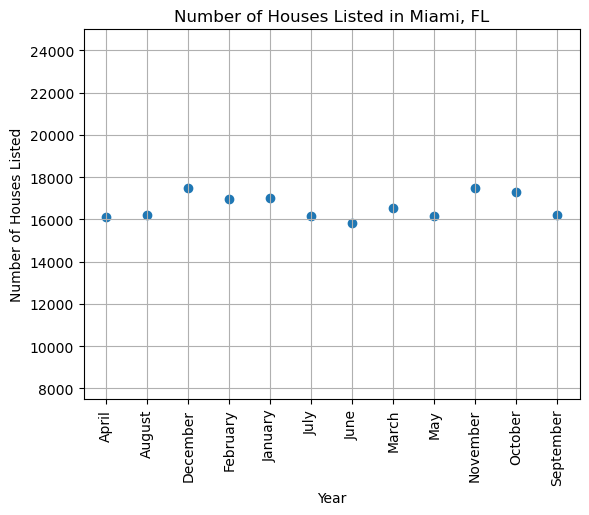

AttributeError: 'Series' object has no attribute 'to_Frame'

In [10]:
#Listing by Month
y1a_axis = housPrice_df['Housing_Price']
x1a_axis = housPrice_df['Month']
plt.scatter(x1a_axis, y1a_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')
plt.grid(True)
plt.show()


#Listing by Month
y1a_axis = Housing_DF['Listings_Count']
x1a_axis = Housing_DF['Month']
plt.scatter(x1a_axis, y1a_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)
plt.show()

#Average Listing by Month
y2a_axis = Avg_MHousing_DS
x2a_axis = Avg_MHousing_DS.index
plt.scatter(x2a_axis, y2a_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)
plt.show()


#Listing by Month
Avg_MhousPrice_ds = housPrice_df.groupby('Month')['Housing_Price'].mean()
Avg_MhousPrice_ds = Avg_MhousPrice_ds.rename('Average_Listing')
Avg_MhousPrice_ds = Avg_MhousPrice_ds.to_Frame().reset_index()

#dictionarymonth = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, }
#avgmonthlhousingpricedf['MONTHNUM']= df['month']
month = pd.to_datetime(Avg_MhousPrice_ds.MONTH, format='%b').dt.month

y2a_axis = Avg_MHousing_ds
x2a_axis = Avg_MHousing_ds.index
plt.scatter(x2a_axis, y2a_axis)
plt.xticks(rotation=90)
plt.title('Number of Houses Listed in Miami, FL')
plt.xlabel('Year')
plt.ylabel('Number of Houses Listed')
plt.ylim(7500,25000)
plt.grid(True)
plt.show()

In [ ]:
Avg_MhousPrice_ds

In [ ]:
Avg_MHousing_DS

In [ ]:
Housing_DF

In [ ]:
import pandas as pd

# In[2]:

df = pd.read_csv('month_values.csv', names=['month', 'home_value'], skiprows=1)

# In[3]:

df.head()

# In[4]:

#For some reason a lot of empty space in the values
df['month']=df['month'].str.strip()

# In[5]:
month_dict ={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# In[6]:

df['monthnum']=df.month.map(month_dict)

# In[7]:

df =df.sort_values(by='monthnum')

# In[8]:

df.plot(x='month', y='home_value')

# In[9]:

ds = pd.read_csv('month_values.csv', index_col=0, names=['home_value'], skiprows=1)

# In[10]:
ds = ds.reset_index()

#repeate process as above from this point
ds
